### 데이터 불러오기

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [16]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 500

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


### 데이터 일부 확인

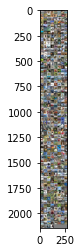

deer  cat   cat   horse horse ship  horse ship  ship  deer  bird  deer  dog   ship  truck deer  bird  plane truck bird  deer  frog  horse dog   bird  deer  ship  ship  frog  truck truck horse cat   plane bird  car   dog   horse ship  car   dog   ship  deer  truck dog   truck truck ship  bird  horse deer  truck bird  cat   ship  horse truck plane truck car   cat   frog  ship  horse plane deer  horse frog  car   horse cat   frog  cat   frog  plane dog   bird  bird  horse plane dog   horse ship  dog   cat   horse plane ship  frog  ship  ship  car   deer  truck horse frog  dog   dog   deer  deer  bird  ship  ship  dog   plane truck car   horse bird  bird  plane horse frog  deer  dog   truck horse horse dog   deer  car   dog   ship  deer  frog  truck car   truck ship  car   dog   bird  deer  horse deer  dog   plane horse dog   cat   truck frog  ship  ship  car   cat   frog  deer  cat   horse ship  ship  ship  ship  frog  ship  truck ship  truck car   dog   plane deer  ship  ship  horse dog 

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

## 모델 정의
이후부터 과제 진행하시면 됩니다! 위는 수정 XX

'#####으로 표시된 부분에 작성하세요!

In [62]:
import torch.nn as nn

In [6]:
# conv. layer, relu,  pooling layer, fc layer를 모두 1층 이상 사용하는 모델 Net()을 만들어주세요

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        ##### 아래 작성 #####
        self.feature=nn.Sequential(nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, stride=1),    # (4,3,32,32) -> (4,16,28,28)
                        nn.ReLU(),
                        nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1),    # (4,16,28,28) -> (4,32,24,24)
                        nn.ReLU(),
                        nn.MaxPool2d(kernel_size=2, stride=2),                                  # (4,32,24,24) -> (4,32,12,12)

                        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1),   # (4,32,12,12) -> (4,64,8,8)
                        nn.ReLU(),
                        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, stride=1),   # (4,64,8,8) -> (4,128,4,4)
                        nn.ReLU(),
                        nn.MaxPool2d(kernel_size=2, stride=2))                                  # (4,128,4,4) -> (4,128,2,2)
                        
        self.fc_layer=nn.Sequential(nn.Linear(128*2*2,100),                                      # (4,128*2*2) -> (4,100)
                                    nn.ReLU(),
                                    nn.Linear(100,10))                                          # (4,100) -> (4,10)

    def forward(self, x):
       ##### 아래 작성 #####
        x=self.feature(x)
        x=x.view(x.size(0),-1)
        x=self.fc_layer(x)    
        
        return x 

## 손실함수, optimizer 정의
필요한 모듈을 import하고 손실함수는 CrossEntropyLoss, optimizer는 SGD를 사용해주세요.

optimizer의 하이퍼파라미터는 lr=0.001, momentum=0.9로 통일합니다.

작성한 모델이 무거워 실행 시간이 오래 걸린다면 GPU를 활용하세요.

In [65]:
device=torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')  
print(device)

net=Net().to(device)

lr=2e-3

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(),lr=lr)

cuda:0


## 모델 구조 확인
필요한 모듈을 import하여 모델의 구조를 확인하세요.

In [10]:
from torchsummary import summary
summary(net,(3,32,32), batch_size=500)   

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [500, 16, 28, 28]           1,216
              ReLU-2          [500, 16, 28, 28]               0
            Conv2d-3          [500, 32, 24, 24]          12,832
              ReLU-4          [500, 32, 24, 24]               0
         MaxPool2d-5          [500, 32, 12, 12]               0
            Conv2d-6            [500, 64, 8, 8]          51,264
              ReLU-7            [500, 64, 8, 8]               0
            Conv2d-8           [500, 128, 4, 4]         204,928
              ReLU-9           [500, 128, 4, 4]               0
        MaxPool2d-10           [500, 128, 2, 2]               0
           Linear-11                 [500, 100]          51,300
             ReLU-12                 [500, 100]               0
           Linear-13                  [500, 10]           1,010
Total params: 322,550
Trainable params:

## Train

In [8]:
# 모델을 학습

for epoch in range(10):

    running_loss = 0.0
    for i, data in enumerate(trainloader):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data
        ##### 아래 작성 #####
        inputs=inputs.to(device)
        labels=labels.to(device)
        optimizer.zero_grad()
        pred=net.forward(inputs)
        loss=criterion(pred,labels)
        loss.backward()
        optimizer.step()


        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 50 == 49:    # print every 50 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 50:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,    50] loss: 2.006
[1,   100] loss: 1.644
[2,    50] loss: 1.459
[2,   100] loss: 1.356
[3,    50] loss: 1.245
[3,   100] loss: 1.189
[4,    50] loss: 1.093
[4,   100] loss: 1.044
[5,    50] loss: 0.982
[5,   100] loss: 0.954
[6,    50] loss: 0.887
[6,   100] loss: 0.909
[7,    50] loss: 0.817
[7,   100] loss: 0.833
[8,    50] loss: 0.768
[8,   100] loss: 0.780
[9,    50] loss: 0.701
[9,   100] loss: 0.737
[10,    50] loss: 0.677
[10,   100] loss: 0.660
Finished Training


## Test

In [21]:
dataiter = iter(testloader)
images, labels = dataiter.next()

In [9]:
## 아래 코드 그대로 실행

correct = 0
total = 0
# 학습 중이 아니므로, 출력에 대한 변화도를 계산할 필요가 없습니다
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # 신경망에 이미지를 통과시켜 출력을 계산합니다
        images=images.to(device)
        labels=labels.to(device)
        outputs = net(images)
        # 가장 높은 값(energy)를 갖는 분류(class)를 정답으로 선택하겠습니다
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 69 %


## 클래스별 accuracy 비교

In [10]:
## 아래 코드 그대로 실행

# 각 분류(class)에 대한 예측값 계산을 위해 준비
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# 변화도는 여전히 필요하지 않습니다
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images=images.to(device)
        labels=labels.to(device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # 각 분류별로 올바른 예측 수를 모읍니다
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# 각 분류별 정확도(accuracy)를 출력합니다
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 71.8 %
Accuracy for class: car   is 84.7 %
Accuracy for class: bird  is 61.2 %
Accuracy for class: cat   is 43.1 %
Accuracy for class: deer  is 49.3 %
Accuracy for class: dog   is 58.0 %
Accuracy for class: frog  is 85.9 %
Accuracy for class: horse is 76.6 %
Accuracy for class: ship  is 76.3 %
Accuracy for class: truck is 87.2 %


#  **How_to_train_well 과제**

**1.데이터 양 불리기**

In [2]:
transform0 = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform1 = transforms.Compose(
    [transforms.Lambda(lambda x:x.rotate(-15)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform2 = transforms.Compose(
    [ transforms.Lambda(lambda x:x.rotate(15)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset0 = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform0)

trainset1 = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform1)

trainset2 = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform2)

trainset=torch.utils.data.ConcatDataset([trainset0,trainset1,trainset2])


batch_size = 500


trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform0)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


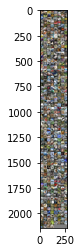

bird  plane deer  deer  ship  ship  deer  truck car   deer  truck frog  cat   truck dog   bird  truck deer  horse bird  ship  dog   deer  car   horse dog   horse plane dog   car   cat   frog  ship  frog  deer  ship  frog  truck ship  dog   horse ship  bird  frog  horse deer  car   ship  deer  dog   frog  ship  frog  dog   truck horse car   ship  frog  dog   deer  dog   frog  dog   car   plane ship  car   frog  frog  plane dog   dog   frog  dog   dog   plane deer  cat   frog  deer  cat   deer  frog  deer  plane bird  deer  bird  dog   truck car   cat   cat   ship  plane cat   bird  cat   horse horse ship  frog  frog  cat   frog  deer  truck dog   cat   cat   deer  truck dog   deer  cat   dog   horse plane cat   deer  dog   horse truck cat   bird  frog  deer  cat   truck deer  truck dog   deer  car   frog  horse horse ship  car   ship  truck dog   ship  cat   dog   truck ship  deer  dog   frog  deer  plane frog  cat   plane horse bird  dog   horse plane dog   ship  frog  bird  frog  car 

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

**2.Batch Normalization, Dropout, L2 Regulaization 사용**

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        ##### 아래 작성 #####
        self.feature=nn.Sequential(nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, stride=1),    # (4,3,32,32) -> (4,16,28,28)
                        nn.BatchNorm2d(16),
                        nn.ReLU(),
                        nn.Dropout(0.2),
                        nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1),    # (4,16,28,28) -> (4,32,24,24)
                        nn.BatchNorm2d(32),
                        nn.ReLU(),
                        nn.Dropout(0.2),
                        nn.MaxPool2d(kernel_size=2, stride=2),                                  # (4,32,24,24) -> (4,32,12,12)
                        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1),   # (4,32,12,12) -> (4,64,8,8)
                        nn.BatchNorm2d(64),
                        nn.ReLU(),
                        nn.Dropout(0.2),
                        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, stride=1),   # (4,64,8,8) -> (4,128,4,4)
                        nn.BatchNorm2d(128),
                        nn.ReLU(),
                        nn.Dropout(0.2),
                        nn.MaxPool2d(kernel_size=2, stride=2))                                  # (4,128,4,4) -> (4,128,2,2)
                        
        self.fc_layer=nn.Sequential(nn.Linear(128*2*2,100),                                      # (4,128*2*2) -> (4,100)
                                    nn.ReLU(),
                                    nn.Linear(100,10))                                          # (4,100) -> (4,10)

    def forward(self, x):
       ##### 아래 작성 #####
        x=self.feature(x)
        x=x.view(x.size(0),-1)
        x=self.fc_layer(x)    
        
        return x 

In [4]:
device=torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')  
print(device)

net=Net().to(device)

lr=2e-3

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(),lr=lr,weight_decay=1e-6)

cuda:0


In [5]:
# 모델을 학습

for epoch in range(10):

    running_loss = 0.0
    for i, data in enumerate(trainloader):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data
        ##### 아래 작성 #####
        inputs=inputs.to(device)
        labels=labels.to(device)
        optimizer.zero_grad()
        pred=net(inputs)
        loss = criterion(pred,labels)
        loss.backward()
        optimizer.step()


        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 50 == 49:    # print every 50 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 50:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,    50] loss: 1.717
[1,   100] loss: 1.379
[1,   150] loss: 1.266
[1,   200] loss: 1.166
[1,   250] loss: 1.098
[1,   300] loss: 1.068
[2,    50] loss: 1.014
[2,   100] loss: 0.972
[2,   150] loss: 0.974
[2,   200] loss: 0.916
[2,   250] loss: 0.903
[2,   300] loss: 0.893
[3,    50] loss: 0.835
[3,   100] loss: 0.817
[3,   150] loss: 0.817
[3,   200] loss: 0.807
[3,   250] loss: 0.796
[3,   300] loss: 0.785
[4,    50] loss: 0.738
[4,   100] loss: 0.749
[4,   150] loss: 0.726
[4,   200] loss: 0.732
[4,   250] loss: 0.730
[4,   300] loss: 0.721
[5,    50] loss: 0.670
[5,   100] loss: 0.669
[5,   150] loss: 0.698
[5,   200] loss: 0.682
[5,   250] loss: 0.674
[5,   300] loss: 0.677
[6,    50] loss: 0.638
[6,   100] loss: 0.637
[6,   150] loss: 0.642
[6,   200] loss: 0.634
[6,   250] loss: 0.623
[6,   300] loss: 0.637
[7,    50] loss: 0.593
[7,   100] loss: 0.593
[7,   150] loss: 0.595
[7,   200] loss: 0.593
[7,   250] loss: 0.596
[7,   300] loss: 0.598
[8,    50] loss: 0.551
[8,   100] 

In [6]:
## 아래 코드 그대로 실행

correct = 0
total = 0
net.eval()
# 학습 중이 아니므로, 출력에 대한 변화도를 계산할 필요가 없습니다
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # 신경망에 이미지를 통과시켜 출력을 계산합니다
        images=images.to(device)
        labels=labels.to(device)
        outputs = net.forward(images)
        # 가장 높은 값(energy)를 갖는 분류(class)를 정답으로 선택하겠습니다
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 76 %


In [7]:
## 아래 코드 그대로 실행

# 각 분류(class)에 대한 예측값 계산을 위해 준비
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# 변화도는 여전히 필요하지 않습니다
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images=images.to(device)
        labels=labels.to(device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # 각 분류별로 올바른 예측 수를 모읍니다
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# 각 분류별 정확도(accuracy)를 출력합니다
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 78.8 %
Accuracy for class: car   is 85.5 %
Accuracy for class: bird  is 76.2 %
Accuracy for class: cat   is 54.0 %
Accuracy for class: deer  is 74.6 %
Accuracy for class: dog   is 59.9 %
Accuracy for class: frog  is 82.6 %
Accuracy for class: horse is 81.2 %
Accuracy for class: ship  is 88.1 %
Accuracy for class: truck is 82.4 %
